### Multiple Regression

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import sklearn.metrics as metrics
import scipy.stats as stats

In [17]:
"""The following code opens our modified dataset for model processing. It then drops the necessary columns. We then convert the variables Year, Month, Wea into objective 
variables so the model can identify them as categorical"""
ocean = pd.read_csv('ocean17.csv', index_col=0)
ocean['Salnty'] = ocean['Salnty']
ocean['O2ml_L'] = ocean['O2ml_L']**2
ocean['Lat_Dec'] = ocean['Lat_Dec']**2
ocean['Lon_Dec'] = ocean['Lon_Dec']**2
ocean['Bottom_D'] = ocean['Bottom_D']**2
ocean['Depthm'] = ocean['Depthm']**2

columns_to_drop = ['Wind_Dir','STheta','T_degC']
ocean = ocean.drop(columns=columns_to_drop)
ocean[['Wea','Year', 'Month']] = ocean[[ 'Wea','Year', 'Month']].astype('object')

ocean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 765355 to 830772
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Salnty    2000 non-null   float64
 1   Depthm    2000 non-null   int64  
 2   O2ml_L    2000 non-null   float64
 3   Year      2000 non-null   object 
 4   Month     2000 non-null   object 
 5   Lat_Dec   2000 non-null   float64
 6   Lon_Dec   2000 non-null   float64
 7   Bottom_D  2000 non-null   float64
 8   Wea       2000 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 156.2+ KB


In [18]:
df = ocean.copy()
dummies = pd.get_dummies(df, drop_first=True)

dummies

/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_4729/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_4729/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_4729/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)


,Salnty,Depthm,O2ml_L,Lat_Dec,Lon_Dec,Bottom_D,Year_2005,Year_2006,Year_2007,Year_2008,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,250000,0.4900,980.837982,15312.825025,15484225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,40000,4.3264,1116.784980,13900.802846,403225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,62500,3.0625,1116.784980,13900.802846,403225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,90000,1.4400,1116.784980,13900.802846,403225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,160000,0.4900,1116.784980,13900.802846,403225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,62500,2.1025,1299.842820,14888.473588,1792921.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,90000,1.2544,1299.842820,14888.473588,1792921.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,160000,0.5184,1299.842820,14888.473588,1792921.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,250000,0.1600,1299.842820,14888.473588,1792921.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
""" A multi regression model is fit."""
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]
# Add a constant term to the independent variables
x = sm.add_constant(x)

# Fit the multiple regression model
model = sm.OLS(y, x).fit()

# Display the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     616.7
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:35:45   Log-Likelihood:                 3429.0
No. Observations:                2000   AIC:                            -6802.
Df Residuals:                    1972   BIC:                            -6645.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9791      0.057    616.118      0.0

In [20]:
""" Outlier are identified based on Cooks Distance"""

inf = model.get_influence()
C, _ = inf.cooks_distance

# Set a threshold for Cook's distance
threshold = 4 / len(y)

# Identify outliers based on Cook's distance
outliers = np.where(C > threshold)[0]

# Print the indices of outliers identified by Cook's distance
print("Indices of outliers identified by Cook's distance:")
print(np.where(C > threshold)[0])


Indices of outliers identified by Cook's distance:
[  59   64  278  349  361  362  431  432  439  472  722  814  815 1049
 1050 1119 1232 1294 1315 1316 1320 1321 1323 1324 1335 1336 1337 1339
 1340 1341 1342 1406 1446 1447 1475 1476 1477 1543 1548 1581 1583 1621
 1660 1759 1764 1803 1874 1909 1927 1929 1934 1935 1936 1938 1950 1951
 1952 1955 1957 1958 1959 1960 1962 1990]


/Users/pranaylingareddy/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:848: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


In [21]:
dummies

,Salnty,Depthm,O2ml_L,Lat_Dec,Lon_Dec,Bottom_D,Year_2005,Year_2006,Year_2007,Year_2008,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,250000,0.4900,980.837982,15312.825025,15484225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,40000,4.3264,1116.784980,13900.802846,403225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,62500,3.0625,1116.784980,13900.802846,403225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,90000,1.4400,1116.784980,13900.802846,403225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,160000,0.4900,1116.784980,13900.802846,403225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,62500,2.1025,1299.842820,14888.473588,1792921.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,90000,1.2544,1299.842820,14888.473588,1792921.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,160000,0.5184,1299.842820,14888.473588,1792921.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,250000,0.1600,1299.842820,14888.473588,1792921.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
dummies_nooutlier = dummies.reset_index(drop=True)
subset_indices = [59, 64, 278, 351, 361, 362, 431, 432, 439, 472, 640, 814, 815, 1049,
1050, 1215, 1232, 1294, 1315, 1316, 1317, 1320, 1321, 1335, 1336, 1339,
1340, 1341, 1342, 1349, 1406, 1447, 1477, 1488, 1489, 1543, 1548, 1580,
1581, 1600, 1621, 1759, 1764, 1799, 1803, 1874, 1927, 1929, 1931, 1935,
1936, 1938, 1939, 1949, 1955, 1957, 1958, 1959, 1960, 1973, 1976, 1977,
1978, 1981, 1982, 1984, 1985, 1986, 1992, 1993, 1994, 1995, 1999]
dummies_nooutlier = dummies_nooutlier.drop(subset_indices)

In [23]:

dummies_nooutlier

,Salnty,Depthm,O2ml_L,Lat_Dec,Lon_Dec,Bottom_D,Year_2005,Year_2006,Year_2007,Year_2008,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
0,34.155,250000,0.4900,980.837982,15312.825025,15484225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,34.148,40000,4.3264,1116.784980,13900.802846,403225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,34.184,62500,3.0625,1116.784980,13900.802846,403225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,34.259,90000,1.4400,1116.784980,13900.802846,403225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,34.301,160000,0.4900,1116.784980,13900.802846,403225.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,34.303,360000,0.0676,1292.762025,15336.758485,15031129.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1991,34.319,490000,0.0529,1292.762025,15336.758485,15031129.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1996,34.166,90000,1.2544,1299.842820,14888.473588,1792921.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1997,34.191,160000,0.5184,1299.842820,14888.473588,1792921.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
"""The following code splits into predictor variables (x) 
and the target variable (y). Then the data is split into 80% of the data is used for training (x_train and y_train) 
and 20% is used for testing (x_test and y_test). Finally, a multi regression model is fit."""

x = dummies_nooutlier.iloc[:, 1:]
y = dummies_nooutlier.iloc[:, :1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     648.8
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:35:45   Log-Likelihood:                 3633.7
No. Observations:                1927   AIC:                            -7215.
Df Residuals:                    1901   BIC:                            -7071.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9922      0.049    716.585      0.0

In [25]:
""" The code is evaluating the performance of the linear regression model using various metrics"""
y_pred = mlr.predict(x_test)
x = dummies_nooutlier.iloc[:, 1:]


meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 89.49
Mean Absolute Error: 0.02691530417158772
Mean Square Error: 0.0011915273235428986
Root Mean Square Error: 0.03451850697152034


In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
"""This code preforms a 5 k-fold validaton """
# Split the data into features (x) and target variable (y)
x = dummies_nooutlier.iloc[:, 1:]
y = dummies_nooutlier.iloc[:, :1]
# Split the data into training, validation, and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=100)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=100)

# Linear Regression Model Fitting using scikit-learn
mlr = LinearRegression()

# Combine training and validation sets for cross-validation
x_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='r2')

# Train the model on the combined training and validation sets
mlr.fit(x_combined, y_combined)

# Model performance on training set
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, mlr.predict(x_train))
train_meanSqErr = metrics.mean_squared_error(y_train, mlr.predict(x_train))
train_rootMeanSqErr = np.sqrt(train_meanSqErr)

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Squared Error:', train_meanSqErr)
print('Root Mean Squared Error:', train_rootMeanSqErr)

# Model performance on testing set
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, mlr.predict(x_test))
test_meanSqErr = metrics.mean_squared_error(y_test, mlr.predict(x_test))
test_rootMeanSqErr = np.sqrt(test_meanSqErr)

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Squared Error:', test_meanSqErr)
print('Root Mean Squared Error:', test_rootMeanSqErr)

# Cross-validation scores
print('\nCross-Validation Scores:')
print('R squared scores:', cv_scores)
print('Average R squared: {:.2f}'.format(np.mean(cv_scores) * 100))

# Calculate and print cross-validated Mean Squared Error
cv_mse_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores  # Multiply by -1 to get positive MSE scores
print('Mean Squared Error scores:', cv_mse_scores)
print('Average Mean Squared Error: {:.4f}'.format(np.mean(cv_mse_scores)))


Training Set Performance:
R squared: 89.26
Mean Absolute Error: 0.02912442204791537
Mean Squared Error: 0.0013606660540016677
Root Mean Squared Error: 0.03688720718625453

Testing Set Performance:
R squared: 90.60
Mean Absolute Error: 0.02832506685178383
Mean Squared Error: 0.0012762161428725588
Root Mean Squared Error: 0.03572416749026573

Cross-Validation Scores:
R squared scores: [0.90784711 0.87717587 0.87373751 0.8930535  0.89110866]
Average R squared: 88.86
Mean Squared Error scores: [0.00112361 0.00162894 0.0014984  0.00138359 0.00144623]
Average Mean Squared Error: 0.0014


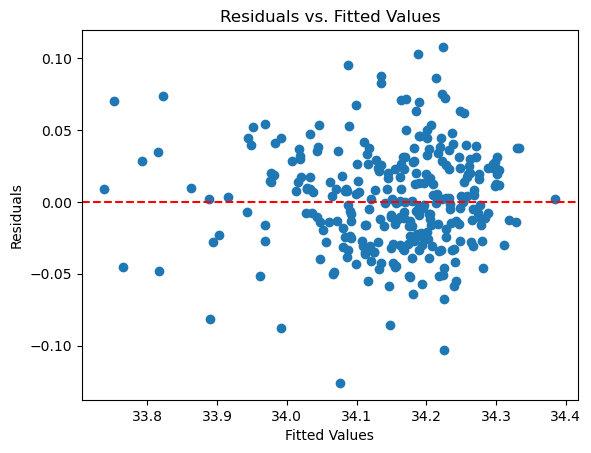

In [27]:
""" This code produces a Residuals vs. Fitted Values plot """

# Get the predicted values
y_pred = mlr.predict(x_test)

# Calculate residuals
residuals = residuals = y_test - y_pred


# Plotting
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [28]:
""" This code produces a Q-Q plot for Residuals """

residuals = model.resid

# Combine residuals for all predictor columns
std_resid = residuals 

# Q-Q plot
plt.figure(figsize=(12, 8))
probplot(std_resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()


NameError: name 'probplot' is not defined

<Figure size 1200x800 with 0 Axes>

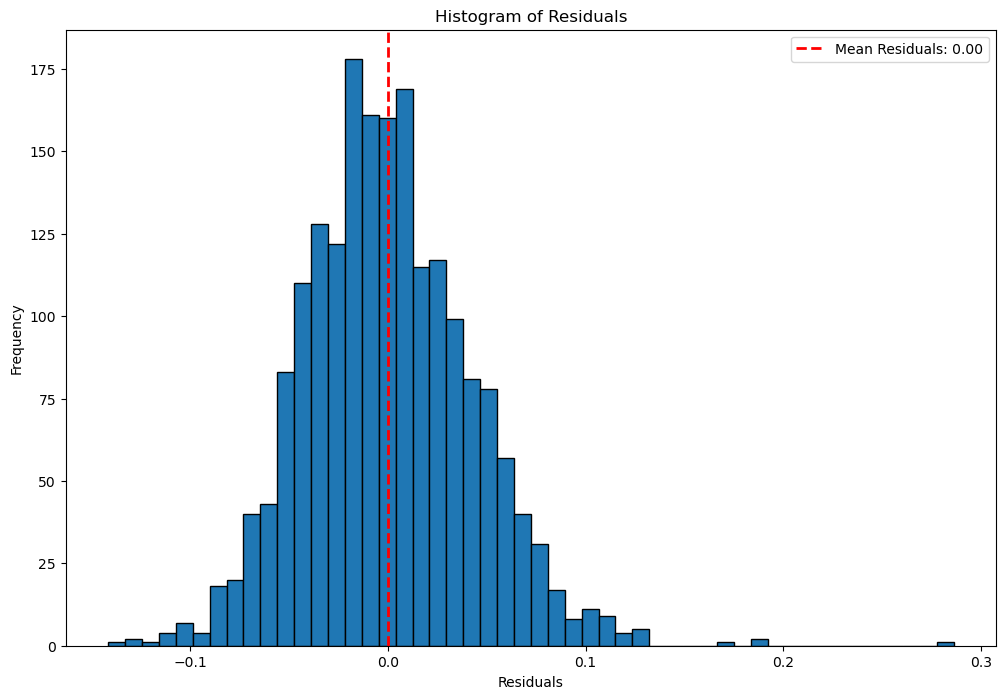

In [14]:
"Code creates a Histogram of residuals"

# Assuming 'model' is your linear regression model
residuals = model.resid

plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Calculate and plot the mean of residuals
mean_residuals = residuals.mean()
plt.axvline(x=mean_residuals, color='red', linestyle='dashed', linewidth=2, label=f'Mean Residuals: {mean_residuals:.2f}')

plt.legend()
plt.show()


In [15]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

# Add a constant term to the predictor matrix
x_train = sm.add_constant(x_train)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

# Display VIF values
print("VIF values:")
print(vif_data)

VIF values:
     Variable          VIF
0       const  3234.552964
1      O2ml_L     1.141419
2     Lat_Dec     1.621848
3     Lon_Dec     3.680482
4    Bottom_D     4.012478
5   Year_2005     3.214655
6   Year_2006     3.918808
7   Year_2007     3.470428
8   Year_2008     1.020851
9   Year_2009          NaN
10  Year_2010     1.799277
11  Year_2011     1.499899
12  Year_2012          NaN
13    Month_2     2.226912
14    Month_3     1.146727
15    Month_4     2.202985
16    Month_6     1.205383
17    Month_7     2.705015
18    Month_8          NaN
19    Month_9     1.502620
20   Month_10     1.739420
21   Month_11     2.376714
22    Wea_1.0     2.522693
23    Wea_2.0     2.633103
24    Wea_3.0     1.024303
25    Wea_4.0     1.308519
26    Wea_6.0     1.046156


/Users/pranaylingareddy/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
